In [57]:
import numpy as np
from matplotlib import pyplot
from matplotlib.pyplot import plot as plt
from numpy.fft import fft
import math

In [58]:
"""
Question 1: Generating sinusoids in Python (15 points)

1. Write a function (t,x) = generateSinusoidal(amplitude, sampling_rate_Hz, frequency_Hz, length_secs, phase_radians) 
    generating a sinusoidal according to the parameters. 
    The outputs x and t are the generated signal and the corresponding time in seconds. 
    Both outputs must be NumPy arrays of the same length.

2. Add a function call to your script to generate a sine wave with the following parameters: 
    amplitude = 1.0, 
    sampling_rate_Hz = 44100, 
    frequency_Hz = 400 Hz, 
    length_secs = 0.5 seconds, 
    phase_radians = pi/2 radians.

3. Plot the first 5 ms of the sinusoid generated in Part 2. above 
    (label the axes correctly, time axis must be in seconds)
"""

def generateSinusoidal(amplitude, sampling_rate_Hz, frequency_Hz, length_secs, phase_radians):
    
    t = np.arange(0, length_secs, 1/sampling_rate_Hz)
    x = amplitude * np.sin(2*np.pi*frequency_Hz*t + phase_radians)
    return t, x

In [59]:
t_sin, x_sin = generateSinusoidal(amplitude = 1.0, 
                   sampling_rate_Hz = 44100, 
                   frequency_Hz = 400, 
                   length_secs = 0.5, 
                   phase_radians = np.pi/2)

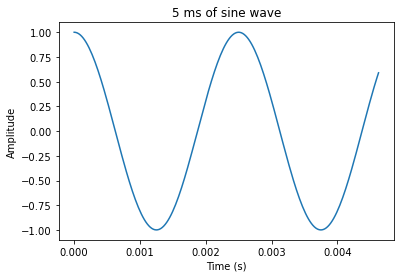

In [60]:
plt(t_sin[:int(0.005*41000)],x_sin[:int(0.005*41000)])
pyplot.title('5 ms of sine wave')
pyplot.xlabel('Time (s)')
pyplot.ylabel('Amplitude')
pyplot.savefig('results/01-Sinewave.png')

In [61]:
"""
Question 2. Combining Sinusoids to generate waveforms with complex spectra (25 points)

1. Write a function (t,x) = generateSquare(amplitude, sampling_rate_Hz, frequency_Hz, length_secs, phase_radians) 
    that generates a square wave approximated with 10 sinusoidal (https://en.wikipedia.org/wiki/Square_wave) 
    according to the parameters. The outputs x and t are the generated signal and the corresponding time in seconds. 
    Both outputs must be NumPy arrays of the same length. 
    Note: use the function generateSinusoidal from Question 1.1 for this part
    
2. Add function calls to your main function to create a square wave with the following parameters: 
    amplitude = 1.0, 
    sampling_rate_Hz = 44100 Hz, 
    frequency_Hz = 400 Hz, 
    length_secs = 0.5 seconds, 
    phase_radians = 0 radians
    
3. Plot the first 5 ms of the generated square waves in Part 2.2.
"""

def generateSquare(amplitude, sampling_rate_Hz, frequency_Hz, length_secs, phase_radians):
    
    t, x = generateSinusoidal(amplitude, sampling_rate_Hz, frequency_Hz, length_secs, phase_radians)
    harmonic_ind = 3
    for _ in range(9):
        _, harmonic = generateSinusoidal(amplitude/harmonic_ind, 
                                         sampling_rate_Hz, 
                                         frequency_Hz*harmonic_ind, 
                                         length_secs, 
                                         phase_radians) 
        x += harmonic
        harmonic_ind += 2
        
    return t, x

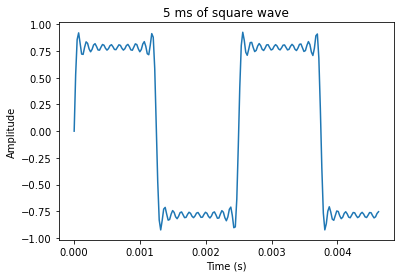

In [62]:
t_square, x_square = generateSquare(amplitude = 1.0, 
                      sampling_rate_Hz = 44100, 
                      frequency_Hz = 400, 
                      length_secs = 0.5, 
                      phase_radians = 0)

plt(t_square[:int(0.005*41000)],x_square[:int(0.005*41000)])
pyplot.title('5 ms of square wave')
pyplot.xlabel('Time (s)')
pyplot.ylabel('Amplitude')
pyplot.savefig('results/02-Squarewave.png')

In [63]:
"""
Question 3. Fourier Transform (25 points)

1. Write a function (f,XAbs,XPhase,XRe,XIm) = computeSpectrum(x, sample_rate_Hz) 
    that computes the FFT of the complete input signal vector x and returns:
        the magnitude spectrum XAbs, 
        the phase spectrum XPhase, 
        the real part XRe, 
        and the imaginary part XIm, 
        the frequency of the bins f. 
    All outputs must be NumPy arrays. Return only the non-redundant part (without symmetry). 
    You may use the NumPy fft function in order to compute the FFT, 
    but do not use fftfreq to calculate the frequency of each bin

2. Add function calls to your main function to compute the spectrum of the sinusoid and square waves 
    generated in Question1.2 and Question 2.2

3. Plot the magnitude and phase spectra for each signal (2 sub-plots for magnitude and phase in 1 plot), 
    (label the axes correctly, frequency axis must be in Hz) 
    (There will be two plots. One for each signal.)

4. What is the frequency resolution (difference in frequency between the bins) of the FFT obtained above?

5. How will the frequency resolution change in this case if you zero-pad the input signal with the same 
    of zeros as the length of the input signal? (Answer 3.4 & 3.5 in a text file in results folder)
"""

def computeSpectrum(x, sample_rate_Hz):
    
    N = len(x)
    x_fft = fft(x)
    XAbs = np.abs(x_fft[0:len(x_fft)//2])
    XPhase = np.angle(x_fft[:N//2])
    XRe = np.real(x_fft[:N//2])
    XIm = np.imag(x_fft[:N//2])
    f = []
    for i in range(N//2):
        f.append(i * sample_rate_Hz / N)
        
    f=np.array(f)
    return f, XAbs, XPhase, XRe, XIm

In [64]:
f_sin, XAbs_sin, XPhase_sin, XRe_sin, XIm_sin = computeSpectrum(x_sin, 41000) 
f_square, XAbs_square, XPhase_square, XRe_square, XIm_square = computeSpectrum(x_square, 41000) 

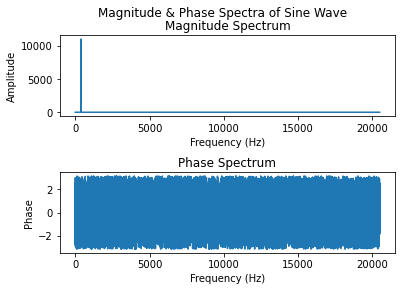

In [65]:
sin_fig, (sin_ax1, sin_ax2) = pyplot.subplots(2)
sin_fig.suptitle('Magnitude & Phase Spectra of Sine Wave')
sin_ax1.plot(f_sin,XAbs_sin)
sin_ax1.title.set_text('Magnitude Spectrum')
sin_ax1.set_xlabel('Frequency (Hz)')
sin_ax1.set_ylabel('Amplitude')
sin_ax2.plot(f_sin,XPhase_sin)
sin_ax2.title.set_text('Phase Spectrum')
sin_ax2.set_xlabel('Frequency (Hz)')
sin_ax2.set_ylabel('Phase')
pyplot.subplots_adjust(hspace = 0.7)
pyplot.show()
sin_fig.savefig('results/03-SineSpectra.png')

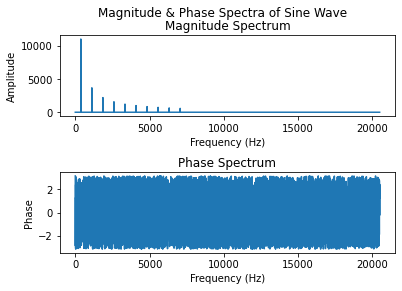

In [66]:
sq_fig, (sq_ax1, sq_ax2) = pyplot.subplots(2)
sq_fig.suptitle('Magnitude & Phase Spectra of Sine Wave')
sq_ax1.plot(f_square,XAbs_square)
sq_ax1.title.set_text('Magnitude Spectrum')
sq_ax1.set_xlabel('Frequency (Hz)')
sq_ax1.set_ylabel('Amplitude')
sq_ax2.plot(f_square,XPhase_square)
sq_ax2.title.set_text('Phase Spectrum')
sq_ax2.set_xlabel('Frequency (Hz)')
sq_ax2.set_ylabel('Phase')
pyplot.subplots_adjust(hspace = 0.7)
pyplot.show()
sq_fig.savefig('results/04-SquareSpectra.png')

In [67]:
# 4. What is the frequency resolution?
res=f_sin[1]-f_sin[0]
print("4. The frequency resolution of the FFT is:", res, "Hz")

4. The frequency resolution of the FFT is: 1.8594104308390023 Hz


In [68]:
# 5. How will the frequency resolution change if you zero-pad the input signal with the 
#    same of zeros as the length of the input signal? 
padded_sin = np.pad(x_sin,(0,len(x_sin)))
f_padded_sin, _, _, _, _ = computeSpectrum(padded_sin, 41000)
padded_res=f_padded_sin[1]-f_padded_sin[0]
print("5. The frequency resolution of the FFT is:", padded_res, "Hz")

5. The frequency resolution of the FFT is: 0.9297052154195011 Hz


In [69]:
with open('results/05-freq_res.txt', 'w') as f:
    f.write("4. The frequency resolution of the FFT is: %s Hz\n" % res)
    f.write("5. The frequency resolution of the FFT is: %s Hz\n" % padded_res)

In [70]:
"""
Question 4. Spectrogram (30 points)

1. Write a function (t, X) = generateBlocks(x, sample_rate_Hz, block_size, hop_size) which blocks a given 
    signal x according to the given parameters. The output t is a NumPy array containing the time stamps of 
    the blocks and X is a matrix (block_size x N) where each column is a block of the signal. 
    Note: You may need to zero-pad the input signal appropriately for the last block. 
    Time stamps should be the time-stamp corresponding to the 1st sample of the block.
    
2. Write a function 
    (freq_vector, time_vector, magnitude_spectrogram) = 
    mySpecgram(x,  block_size, hop_size, sampling_rate_Hz, window_type) 
    that computes the FFT per block windowed using the window type specified. 
    freq_vector and time_vector are both column vectors containing the frequency of the bins 
    in Hz (block_size/2 x 1) and the time stamps of the blocks in seconds (N x 1) respectively 
    where N is the number of blocks. magnitude_spectrogram is a (block_size/2 x N) matrix where 
    each column is the FFT of a signal block.  The parameter window_type is a string which can 
    take the following values: ‘rect’ for a rectangular window and ‘hann’ for a Hann window. 
    The function should also plot the magnitude spectrogram (labeling the axes appropriately) 
    Note: You may use the NumPy fft, hanning and Matplotlib specgram methods. 
    You can use the generateBlocks and computeSpectrum methods which you created earlier.
    
3. Add function calls to mySpecgram() in your main  functions to plot the magnitude spectrogram 
    of the square wave generated in Question 2.2 using 1) the rectangular window, 2) the hann window. 
    Take the block_size as 2048 and the hop_size as 1024. 
    In a text file in results directory, compare the differences in the two plots due to the different windows used.
"""

def generateBlocks(x, sample_rate_Hz, block_size, hop_size):
    
    L = len(x)
    X = [x[i:i+block_size] for i in range(0, L, hop_size)]
    t = np.array([*range(0,L,hop_size)])/sample_rate_Hz
    
    ind=0
    for frame in X:
        len_frame=len(frame)
        if len_frame < block_size:
            X[ind]=np.pad(frame,(0,block_size-len_frame))
        ind += 1
            
    X=np.array(X)
    return t, X

In [71]:
## provided plotting function
def plotSpecgram(freq_vector, time_vector, magnitude_spectrogram):
    if len(freq_vector) < 2 or len(time_vector) < 2:
        return

    Z = 20. * np.log10(magnitude_spectrogram)
    Z = np.flipud(Z)

    pad_xextent = (time_vector[1] - time_vector[0]) / 2
    xmin = np.min(time_vector) - pad_xextent
    xmax = np.max(time_vector) + pad_xextent
    extent = xmin, xmax, freq_vector[0], freq_vector[-1]

    im = pyplot.imshow(Z, None, extent=extent, 
                           origin='upper')
    pyplot.title("Spectrogram from mySpecgram")
    pyplot.xlabel("Time (s)")
    pyplot.ylabel("Frequency (Hz)")
    pyplot.axis('auto')
    pyplot.show()

In [72]:
def mySpecgram(x, block_size, hop_size, sampling_rate_Hz, window_type):
    
    time_vector, frames = generateBlocks(x=x, 
                                         sample_rate_Hz=sampling_rate_Hz, 
                                         block_size=block_size, 
                                         hop_size=hop_size)
    if window_type=="hann":
        frames *= np.hanning(block_size)      
    
    ffts=[]
    for frame in frames:
        freq_vector, XAbs_sin, _, _, _ = computeSpectrum(frame, 41000)
        ffts.append(XAbs_sin)
        
    magnitude_spectrogram=np.array(ffts).T
    plotSpecgram(freq_vector, time_vector, magnitude_spectrogram)
    return freq_vector, time_vector, magnitude_spectrogram

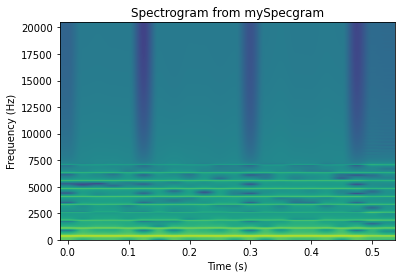

In [73]:
# plot spectrogram of square wave with rect window (block size = 2048, hop size = 1024)
_, _, _ = mySpecgram(x_square,
                    block_size=2048,
                    hop_size=1024,
                    sampling_rate_Hz=41000,
                    window_type="rect")

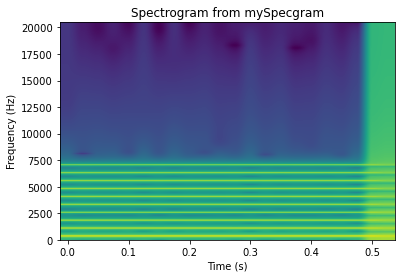

In [74]:
# plot spectrogram of square wave with rect window (block size = 2048, hop size = 1024)
_, _, _ = mySpecgram(x_square,
                    block_size=2048,
                    hop_size=1024,
                    sampling_rate_Hz=41000,
                    window_type="hann")